# Bank Marketing Data Set

---

Author: Matěj Frič (FRI0089)

Date: 9/12/2022

---

## Description

Direct Marketing campaigns (phone calls) of a Portuguese banking institution

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Source 
https://www.kaggle.com/datasets/berkayalan/bank-marketing-data-set

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Columns

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown') **(i.e., missed payments on a debt)**

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; **999 means client was not previously contacted**)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) **(i.e., "number of people who are employed" / "total labor force")**

17 - cons.price.idx: consumer price index - monthly indicator (numeric) **(Consumer price index (CPI) - The annual percentage change in the consumer price index is used as a measure of inflation.)** [[source](https://cs.wikipedia.org/wiki/Index_spot%C5%99ebitelsk%C3%BDch_cen)]

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) **(Increased consumer confidence indicates economic growth in which consumers are spending money, indicating higher consumption.)** [[source](https://en.wikipedia.org/wiki/Consumer_confidence_index)]

19 - euribor3m: euribor 3 month rate - daily indicator (numeric) **(Euribor is an overnight interbank rate comprised of the average interest rates from a panel of large European banks that are used for lending to one another in euros.)** [[source](https://www.investopedia.com/terms/e/euribor.asp)]

20 - nr.employed: number of employees - quarterly indicator (numeric)

21 - **subscribed** : has the client subscribed a term deposit? (binary: 'yes','no') (Termínovaný vklad)

# Exploratory Data Analysis

In [7]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
sns.set_style('darkgrid')

In [8]:
df = pd.read_csv('bank_marketing_dataset.csv', sep=',')
with pd.option_context('display.max_columns', None):
    display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.shape

(41188, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- 41188 records
- 21 columns

In [11]:
df.select_dtypes(include=np.number).head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


- 10 numeric columns

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
df.isna().sum().sort_values(ascending=False).head(5) 

age              0
campaign         0
nr.employed      0
euribor3m        0
cons.conf.idx    0
dtype: int64

- missing data is labeled as 'missing', 'unknown', etc.

## Pairplot

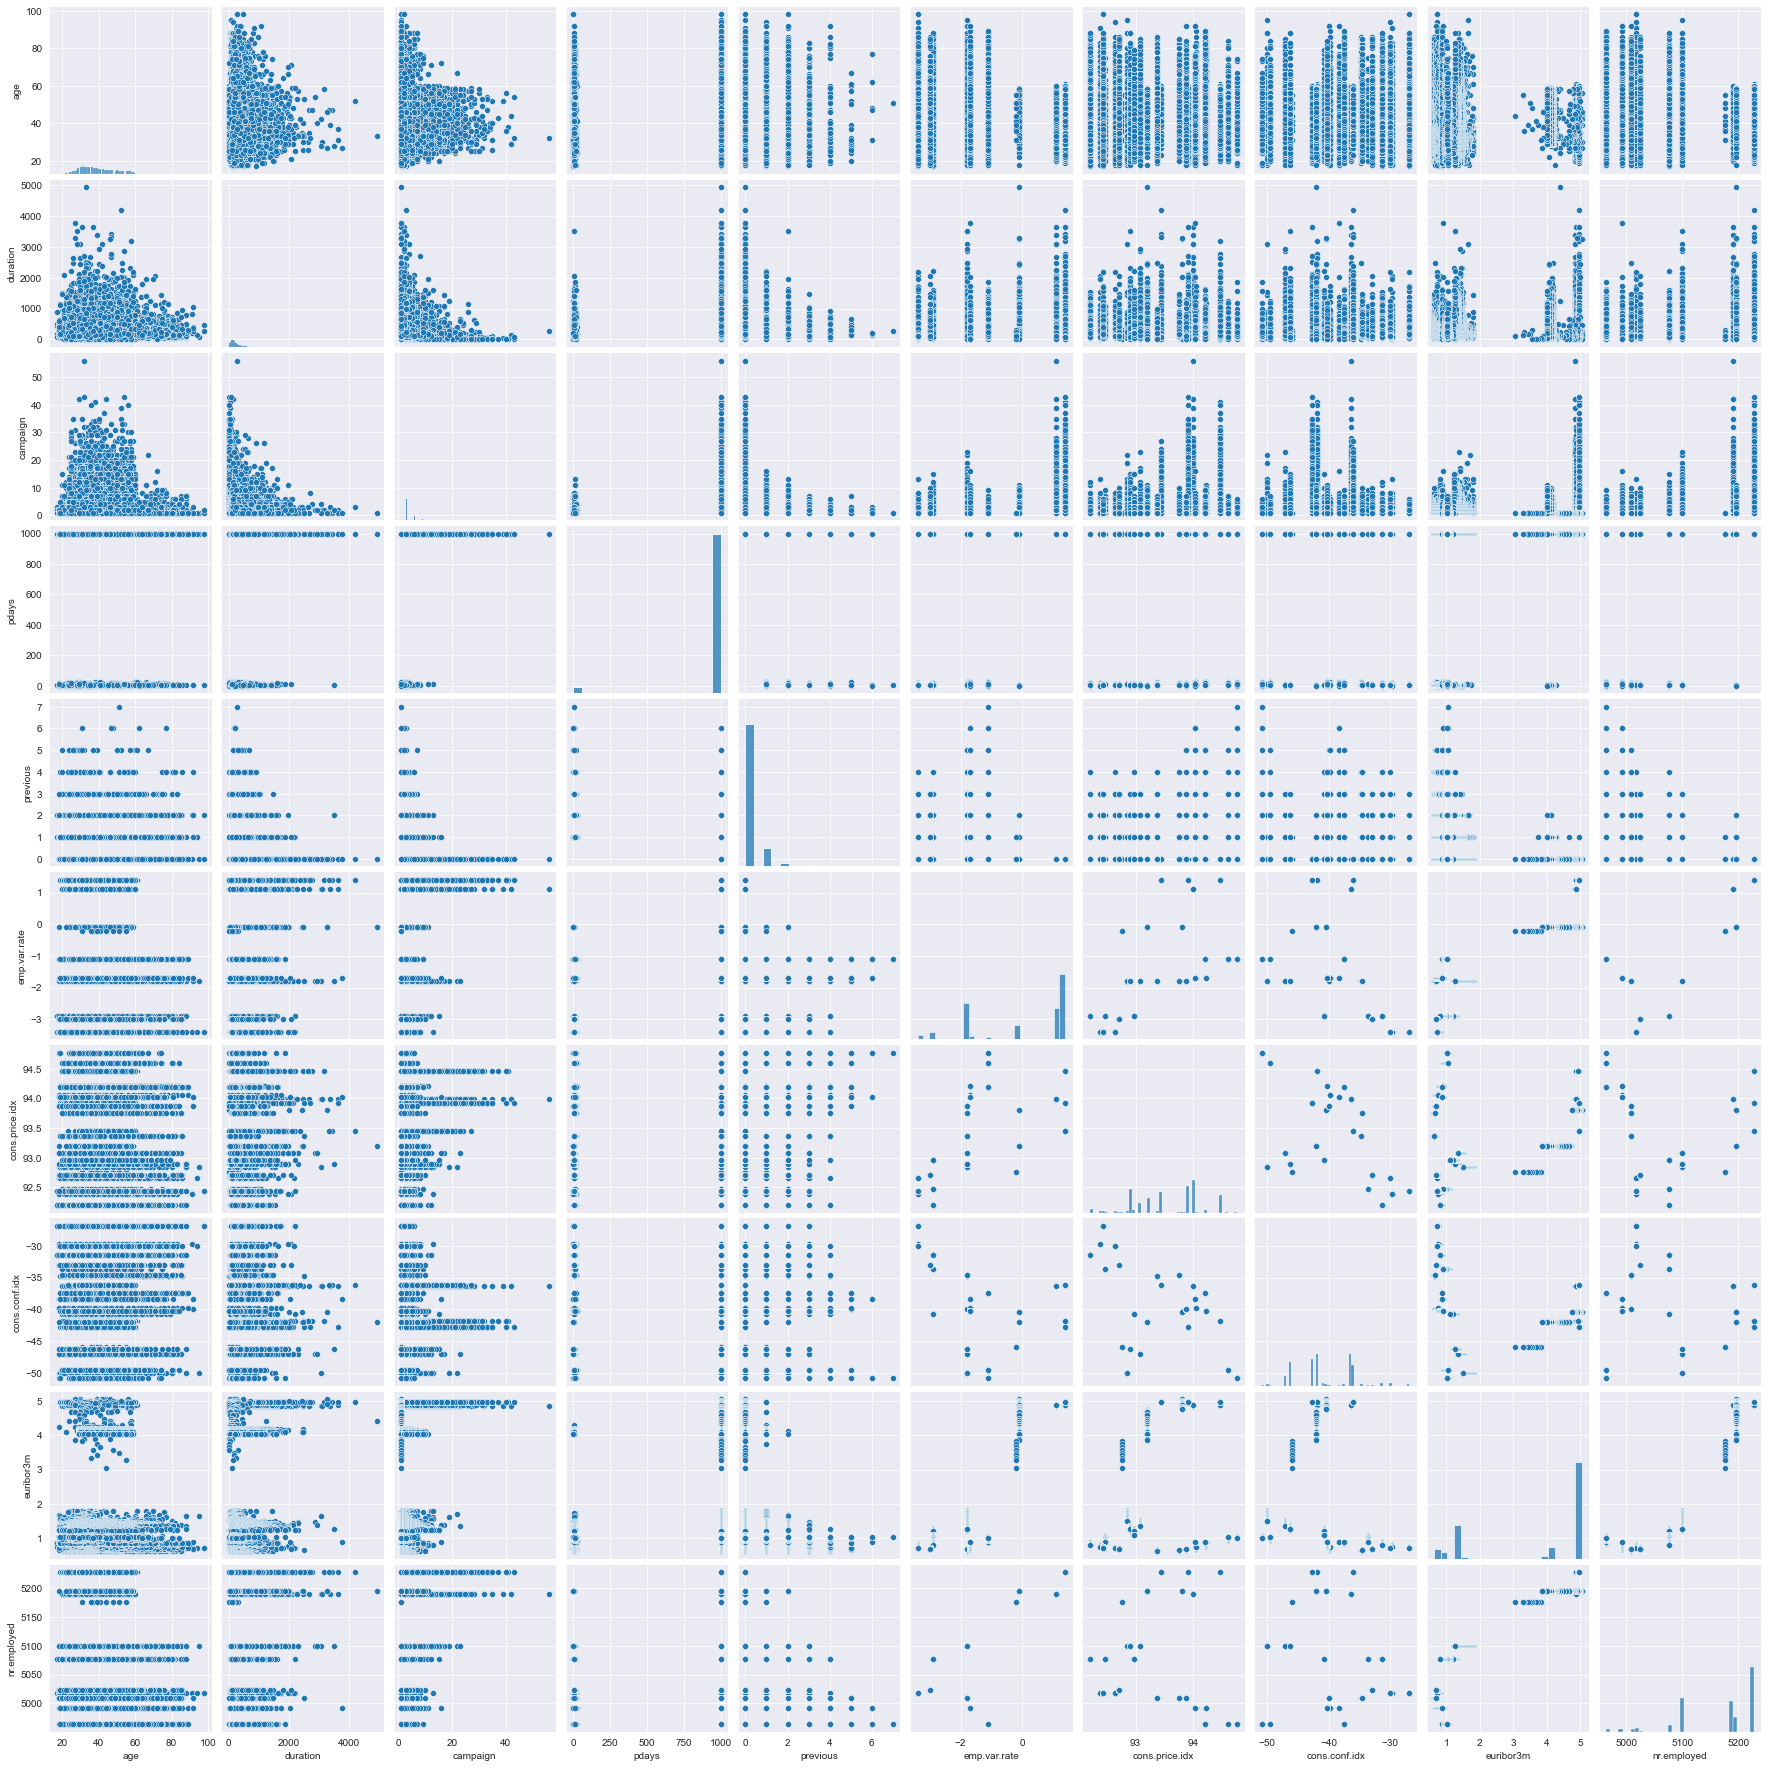

In [14]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(df[numerical_columns])

- Most of the columns contain categorical values.
- There might be a relationship between *age*, *duration* and *campaign*.

## Heatmap

<AxesSubplot:>

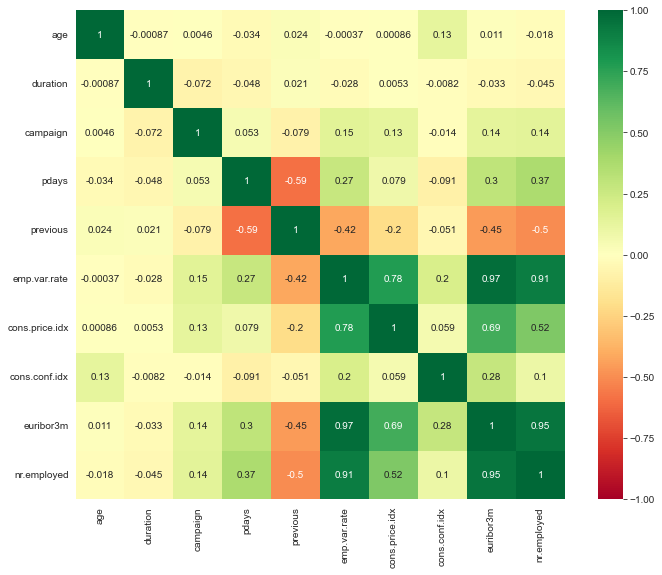

In [15]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

- Column *pdays* is negative correlated with column *previous* because the missing data are respresented by the integer 999. Subsequently, we will remove these entries (replace with None, i.e., mark as missing values).

<AxesSubplot:>

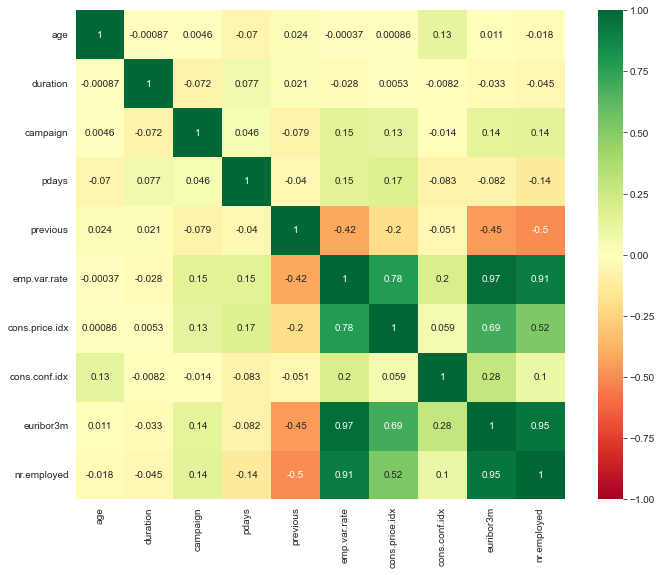

In [16]:
df.loc[df['pdays'] == 999, 'pdays'] = None
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

(**1**) It is clear from the heat map that some economic indicators, such as *emp.var.rate*, *euribor3m*, *cons.price.idx* and *nr.employed*, are highly (positively) correlated because they are all related to economic growth. Higher economic growth increases the value of these indicators.

In [17]:
(df['pdays'].count(), df['age'].count())

(1515, 41188)

**(2)** Most customers appear to be new, or the bank has not contacted its customers, or has not stored the data. (Column *pdays* represents number of days that passed by after the client was last contacted from a previous campaign.)

## Subplots

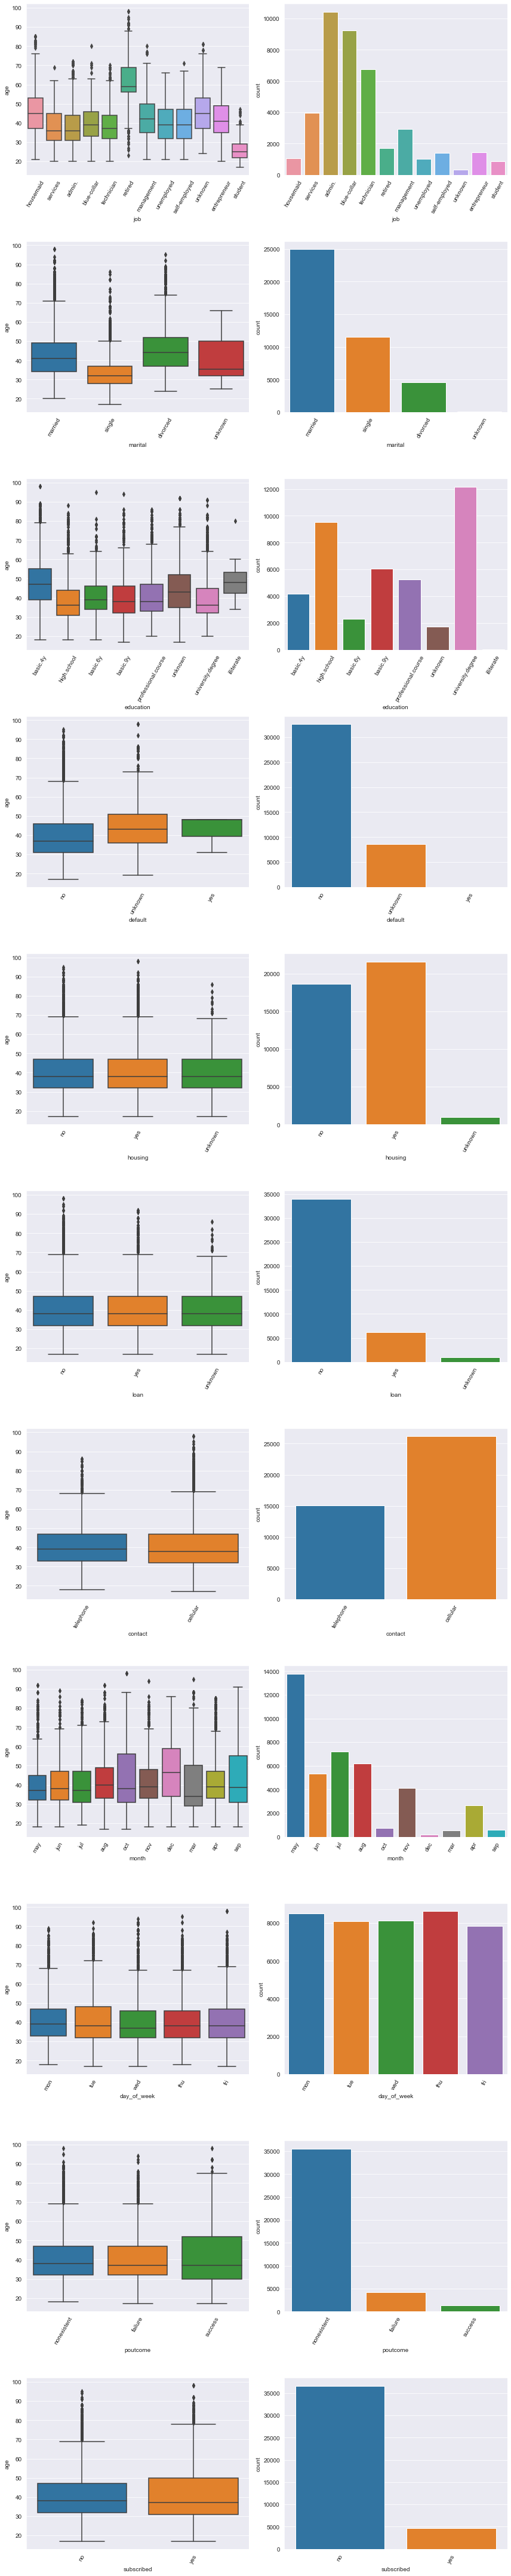

In [18]:
qualitative_columns = df.select_dtypes(exclude=np.number).columns.tolist()

fig, axes = plt.subplots(len(qualitative_columns), 2, figsize=(12, 60))

for i, col in enumerate(qualitative_columns):
    ax_left = fig.axes[2*i]
    ax_right = fig.axes[2*i + 1]
    sns.boxplot(data=df, x=col, y='age', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
        
fig.tight_layout()

There are a few obvious facts about customers:
- elderly customers are often retired; young customers are often students,
- young customers are more likely to be single.

## Characteristics Connected to Age

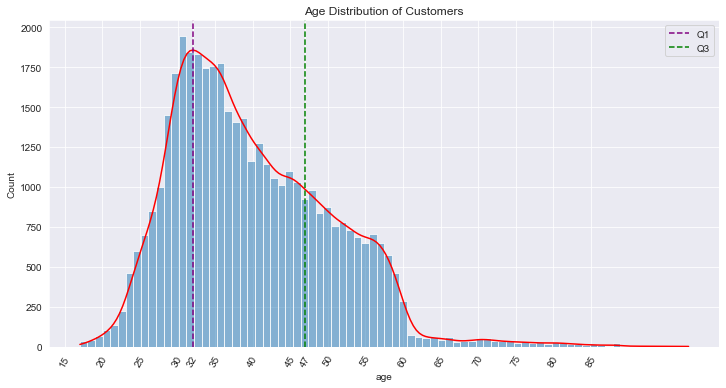

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x="age", bins = 80, kde=True)
ax.lines[0].set_color('red')
plt.axvline(df['age'].quantile(0.25), color = 'purple', ls='--', label = 'Q1')
plt.axvline(df['age'].quantile(0.75), color = 'green', ls='--', label = 'Q3')
xticks = np.arange(15,90,5).tolist()
xticks.append(df['age'].quantile(0.25))
xticks.append(df['age'].quantile(0.75))
plt.xticks(xticks, rotation=60)
plt.title("Age Distribution of Customers")
plt.legend()
plt.show()

**(3)** 50% of customers are in the 32 to 47 age group (interquantile range).

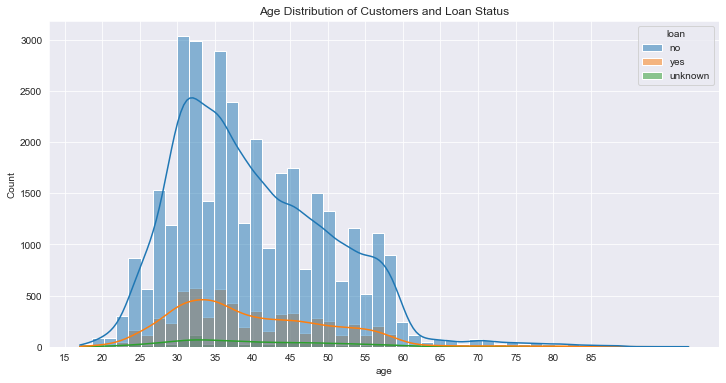

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x="age",hue="loan", bins=50, kde = True)
plt.xticks(np.arange(15,90,5))
plt.title("Age Distribution of Customers and Loan Status")
plt.show()

In [21]:
loan_count = df.groupby("loan")['age'].count()
loan_count

loan
no         33950
unknown      990
yes         6248
Name: age, dtype: int64

In [22]:
customers_with_loans = (loan_count['yes'] / (loan_count['yes'] + loan_count['no'])) * 100 # Missing values are ignored. 
customers_with_loans

15.54306184387283

- 15.5 % of customers have loans

## Education

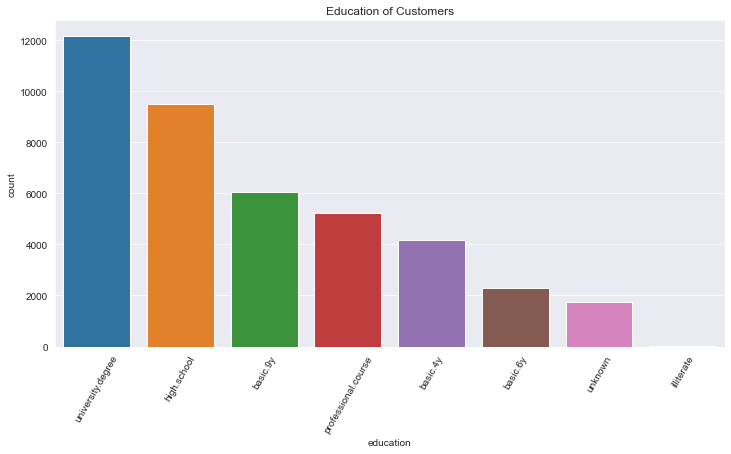

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="education", order=df.education.value_counts().index)
plt.xticks(rotation=60)
plt.title("Education of Customers")
plt.show()

#### Mortgage Vs Education

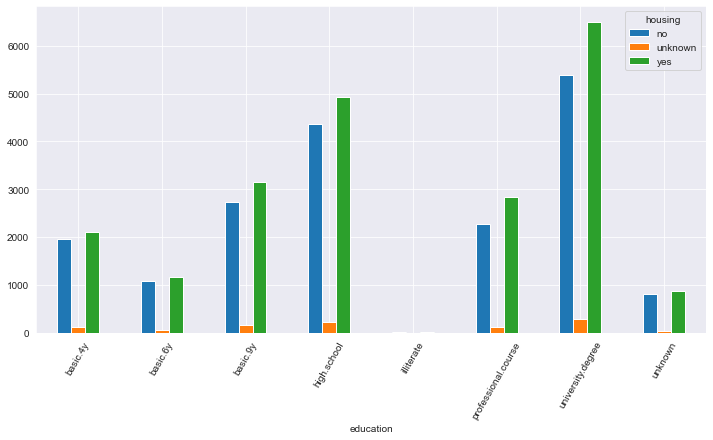

In [24]:
loan_education = df.groupby(["housing","education"])['age'].count()
#display(loan_education)
loan_education.unstack('housing').plot.bar(figsize=(12,6))
plt.xticks(rotation = 60)
plt.show()

**(4)** There are more customers who take out a mortgage than those who don't.

#### Default ("not paying loans") Vs. Education

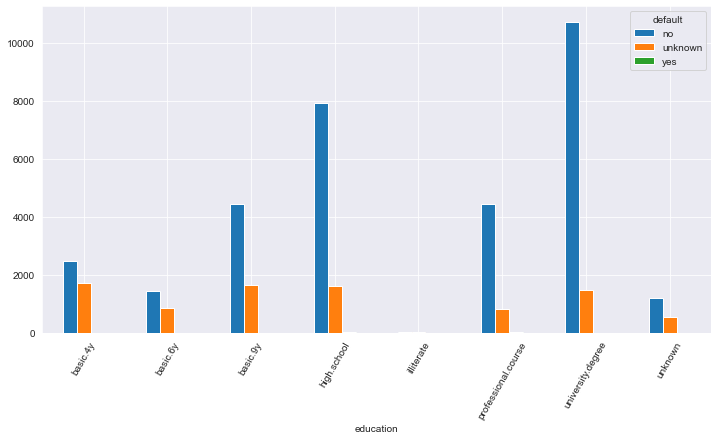

In [25]:
housing_loan_vs_education = df.groupby(["default","education"])['age'].count()
#display(housing_loan_vs_education)
housing_loan_vs_education.unstack('default').plot.bar(figsize=(12,6))
plt.xticks(rotation = 60)
plt.show()

In [26]:
df.loc[df['default'] == 'yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,NaN,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,NaN,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,NaN,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


- There are too many unknowns to draw any conclusions.

### Jobs

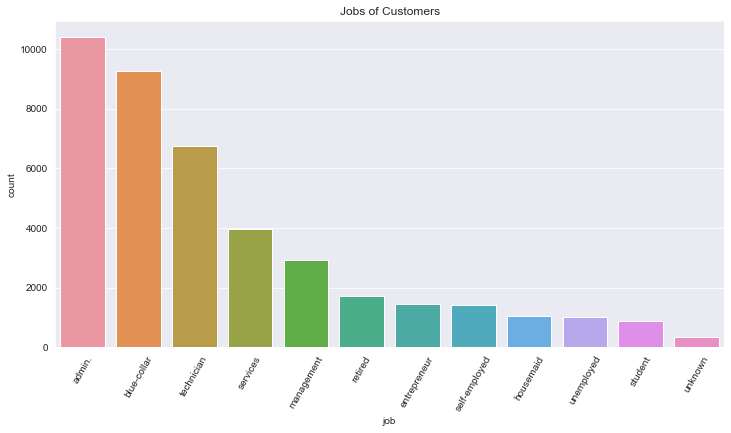

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="job",order=df.job.value_counts().index)
plt.title("Jobs of Customers")
plt.xticks(rotation=60)
plt.show()

## Succesful Campaign (*subscribed*) by Number of Calls (*campaign*)

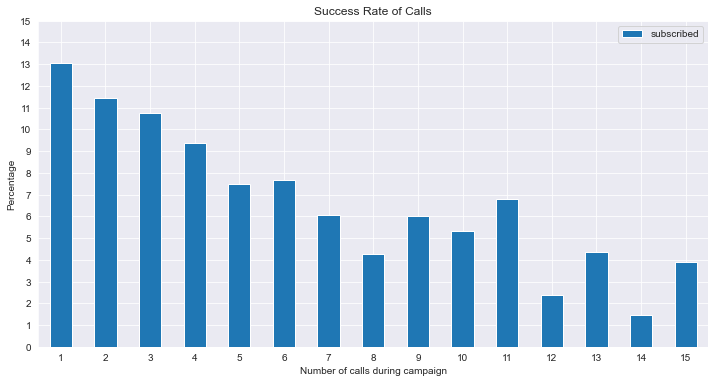

In [28]:
K = 16
subscribed_count = []
for i in range(1, 10):
    subscribed_count.append((len(df[(df['subscribed'] == 'yes') & (df['campaign'] == i)]),
               len(df[df['campaign'] == i]))
              )
#print(subscribed_count)

subscribed_percent = []
not_subscribed_percent = []
for i in range(1,K):
    subscribed_percent.append(len(df[(df['subscribed'] == 'yes') & (df['campaign'] == i)]) / float(len(df[df['campaign'] == i])) * 100)
    not_subscribed_percent.append(len(df[(df['subscribed'] == 'no') & (df['campaign'] == i)]) / float(len(df[df['campaign'] == i])) * 100)
#print(np.array(subscribed_percent))

df2 = pd.DataFrame(data={'x': np.arange(1,K), 'subscribed': subscribed_percent, 'not_subscribed' : not_subscribed_percent})
#display(df2.describe())
df2.plot(x='x', y=['subscribed'], kind="bar", rot=0, stacked=False, figsize=(12,6))
plt.xlabel('Number of calls during campaign')
plt.ylabel('Percentage')
plt.yticks(np.arange(0,16))
plt.title('Success Rate of Calls')
plt.show()

- Approximately 13 % of customers subscribed after the first call.

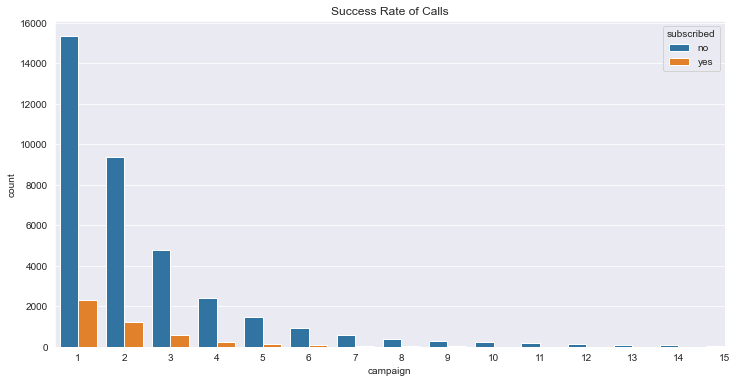

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x = 'campaign', hue = 'subscribed')
plt.xlim(-0.5,14)
plt.title('Success Rate of Calls')
plt.show()

**(5)** The trend is *decreasing*, with more calls fewer customers subscribed.

### Subscribed Vs Qualitative Columns

In [30]:
df_subscribed = df[df['subscribed'] == 'yes']
df_not_subscribed = df[df['subscribed'] == 'no']

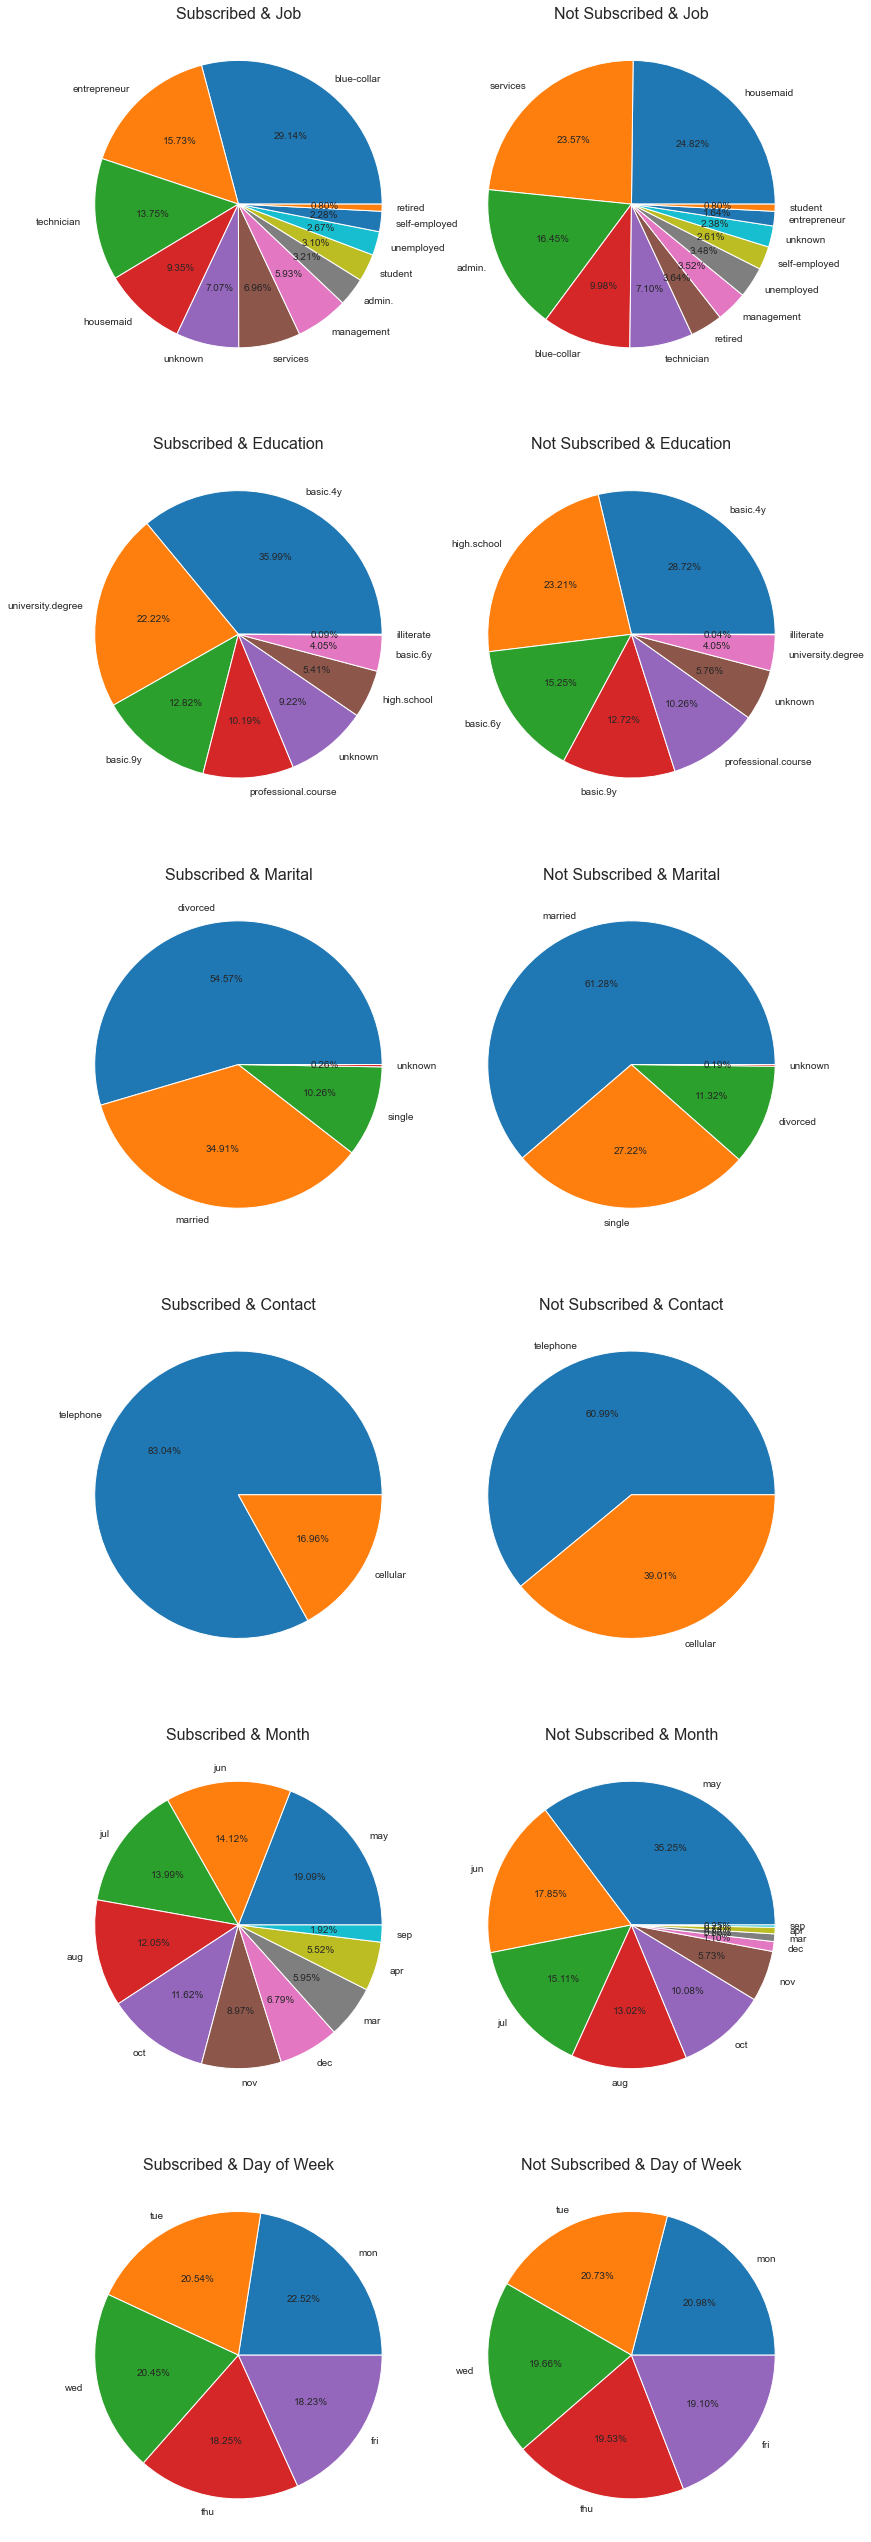

In [31]:
#qualitative_columns = df.select_dtypes(exclude=np.number).columns.tolist()
qualitative_columns = ['job',
                       'education',
                       'marital',
                       'contact',
                       'month',
                       'day_of_week',
                       ]

fig, axes = plt.subplots(len(qualitative_columns), 2, figsize=(12, len(qualitative_columns) * 6))

for i, col in enumerate(qualitative_columns):
    axes[i, 0].pie(x=list(df_subscribed[col].value_counts().values),
                   labels=df_subscribed[col].unique().tolist(),
                   autopct='%.2f%%',
                   )
    axes[i, 0].set_title(f"Subscribed & {col.capitalize().replace('_',' ').replace('of week','of Week')}", fontsize=16)

    axes[i, 1].pie(x=list(df_not_subscribed[col].value_counts().values),
                   labels=df_not_subscribed[col].unique().tolist(),
                   autopct='%.2f%%',
                   )
    axes[i, 1].set_title(f"Not Subscribed & {col.capitalize().replace('_',' ').replace('of week','of Week')}", fontsize=16)

fig.tight_layout()


**(6-10)**

In [32]:
f"Percentage of subscribed customers: {float(len(df_subscribed))/(len(df_subscribed) + len(df_not_subscribed)) * 100:.2f} %"

'Percentage of subscribed customers: 11.27 %'

# EDA Summary

**(1)** 50% of customers are in the 32 to 47 age group (interquantile range).

**(2)** 
It is clear from the heat map that some economic indicators, such as *emp.var.rate*, *euribor3m*, *cons.price.idx* and *nr.employed*, are highly (positively) correlated because they are all related to economic growth. Higher economic growth increases the value of these indicators.

**(3)** Most customers appear to be new, or the bank has not contacted its customers and/or has not stored the data.

**(4)** There are more customers who have a mortgage than those who do not, regardless of education.

**(5)** Approximately 13 % of customers subscribed after the first call. As the number of calls increases, the percentage of subscribers decreases (with more calls, fewer customers subscribed).

**(6-10)** We can summarize the characteristics of customers who have subscribed a term deposit.
The majority of customers who have subscribed (11.27 % of the total number of customers) meet the following criteria:
- job: blue-collar, entrepreneur or technician
- education: basic (four years) or university degree
- marital status: divorced
- contact: telephone
- last contact in May/June/July/August on any day of the week

# Hypotheses

## 1 
Customers contacted on Monday created more term deposits than customers contacted on Tuesday.

In [33]:
day_subscribed = df.groupby(["day_of_week", "subscribed"])["subscribed"].count().reset_index(name="count")
display(day_subscribed)
day_subscribed_mon = day_subscribed.loc[(day_subscribed["day_of_week"] == "mon")]
day_subscribed_tue = day_subscribed.loc[(day_subscribed["day_of_week"] == "tue")]

,day_of_week,subscribed,count
0,fri,no,6981
1,fri,yes,846
2,mon,no,7667
3,mon,yes,847
4,thu,no,7578
5,thu,yes,1045
6,tue,no,7137
7,tue,yes,953
8,wed,no,7185
9,wed,yes,949


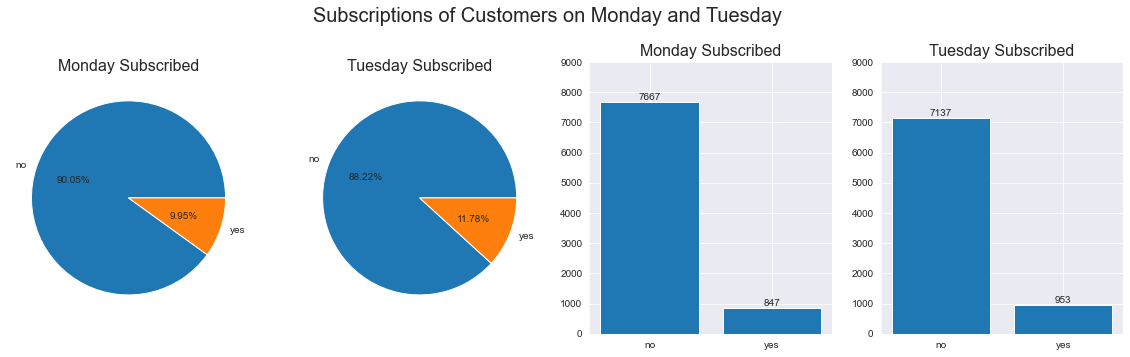

In [34]:
# not_subscribed = day_subscribed_mon.loc[(day_subscribed_mon["subscribed"] == "no")]["count"].values
# subscribed = day_subscribed_mon.loc[(day_subscribed_mon["subscribed"] == "yes")]["count"].values
# print(subscribed/(subscribed+not_subscribed))

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle("Subscriptions of Customers on Monday and Tuesday", fontsize=20, va="bottom", ha= "center")

# PIES
axes[0].pie(x=list(day_subscribed_mon["count"].values),
                labels=day_subscribed_mon["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[0].set_title("Monday Subscribed", fontsize=16)
axes[1].pie(x=list(day_subscribed_tue["count"].values),
                labels=day_subscribed_tue["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[1].set_title("Tuesday Subscribed", fontsize=16)

#BAR PLOTS
bar = axes[2].bar(x=day_subscribed_mon["subscribed"], height = day_subscribed_mon["count"].values)
axes[2].set_title("Monday Subscribed", fontsize=16)
axes[2].bar_label(bar)
axes[2].set_ylim(0,9_000)
bar= axes[3].bar(x=day_subscribed_tue["subscribed"], height = day_subscribed_tue["count"].values)
axes[3].set_title("Tuesday Subscribed", fontsize=16)
axes[3].bar_label(bar)
axes[3].set_ylim(0,9_000);

The hypothesis is false. More customers subscribed a term deposit on Tuesday.

## 2 
Single entrepreneurs subscribed most often compared to married or divorced entrepreneurs.

In [35]:
entrepreneur_marital_sub = df[(df['job'] == 'entrepreneur') & (df['marital'] != "unknown")] # Remove missing values
entrepreneur_marital_sub = entrepreneur_marital_sub.groupby(["marital", "subscribed"])["subscribed"].count().reset_index(name="count")
display(entrepreneur_marital_sub)
single = entrepreneur_marital_sub.loc[(entrepreneur_marital_sub["marital"] == "single")]
divorced = entrepreneur_marital_sub.loc[(entrepreneur_marital_sub["marital"] == "divorced")]
married = entrepreneur_marital_sub.loc[(entrepreneur_marital_sub["marital"] == "married")]

,marital,subscribed,count
0,divorced,no,165
1,divorced,yes,14
2,married,no,983
3,married,yes,88
4,single,no,182
5,single,yes,21


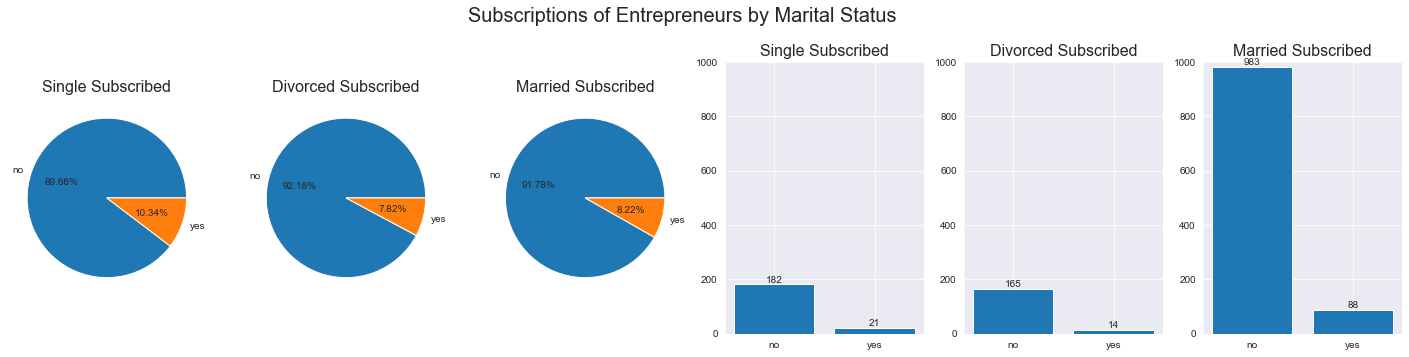

In [36]:
fig, axes = plt.subplots(1, 6, figsize=(25, 5))

fig.suptitle("Subscriptions of Entrepreneurs by Marital Status", fontsize=20, va="bottom", ha= "center")

# PIES
axes[0].pie(x=list(single["count"].values),
                labels=single["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[0].set_title("Single Subscribed", fontsize=16)
axes[1].pie(x=list(divorced["count"].values),
                labels=divorced["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[1].set_title("Divorced Subscribed", fontsize=16)
axes[2].pie(x=list(married["count"].values),
                labels=married["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[2].set_title("Married Subscribed", fontsize=16)

#BAR PLOTS
bar = axes[3].bar(x=single["subscribed"], height = single["count"].values)
axes[3].set_title("Single Subscribed", fontsize=16)
axes[3].bar_label(bar)
axes[3].set_ylim(0,1_000)
bar= axes[4].bar(x=divorced["subscribed"], height = divorced["count"].values)
axes[4].set_title("Divorced Subscribed", fontsize=16)
axes[4].bar_label(bar)
axes[4].set_ylim(0,1_000)
bar= axes[5].bar(x=married["subscribed"], height = married["count"].values)
axes[5].set_title("Married Subscribed", fontsize=16)
axes[5].bar_label(bar)
axes[5].set_ylim(0,1_000);

The hypothesis holds true (relative to the number of customers in each category). 

(The largest number of subscriptions was among married entrepreneurs.)

## 3
Customers with university degree subscribed more often when contacted by telephone.

In [37]:
uni_contact = df[(df['education'] == 'university.degree')].groupby(["contact", "subscribed"])["subscribed"].count().reset_index(name="count")
display(uni_contact)
cell = uni_contact.loc[(uni_contact["contact"] == "cellular")]
tel = uni_contact.loc[(uni_contact["contact"] == "telephone")]

,contact,subscribed,count
0,cellular,no,7219
1,cellular,yes,1438
2,telephone,no,3279
3,telephone,yes,232


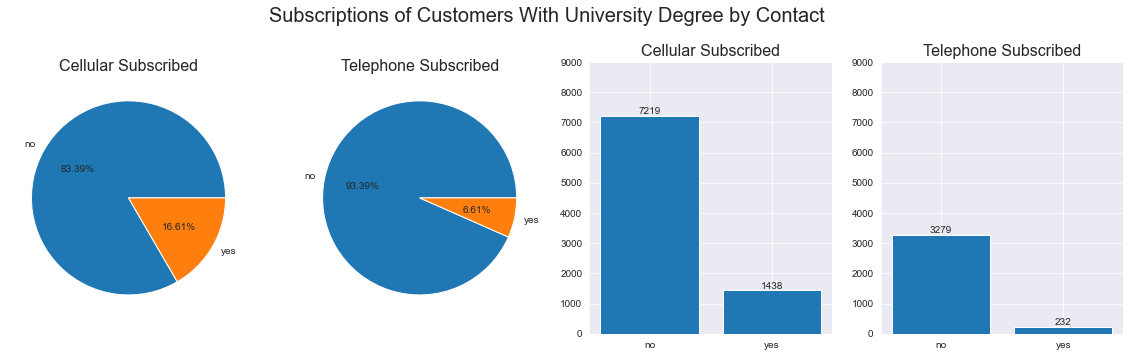

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle("Subscriptions of Customers With University Degree by Contact", fontsize=20, va="bottom", ha= "center")

# PIES
axes[0].pie(x=list(cell["count"].values),
                labels=cell["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[0].set_title("Cellular Subscribed", fontsize=16)
axes[1].pie(x=list(tel["count"].values),
                labels=tel["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[1].set_title("Telephone Subscribed", fontsize=16)

#BAR PLOTS
bar = axes[2].bar(x=cell["subscribed"], height = cell["count"].values)
axes[2].set_title("Cellular Subscribed", fontsize=16)
axes[2].bar_label(bar)
axes[2].set_ylim(0,9_000)
bar= axes[3].bar(x=tel["subscribed"], height = tel["count"].values)
axes[3].set_title("Telephone Subscribed", fontsize=16)
axes[3].bar_label(bar)
axes[3].set_ylim(0,9_000);

The hypothesis is false. More customers with university degree opened a term deposit when they were contacted by cell phone.

## 4

Longer duration of the last call (*duration*) meant success during the previous campaign (*poutcome*).

In [39]:
df.loc[df['poutcome'] == 'nonexistent', 'poutcome'] = None

<AxesSubplot:xlabel='poutcome', ylabel='count'>

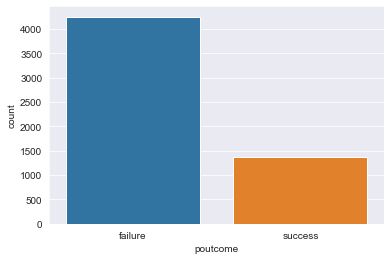

In [40]:
df_poutcome_duration = df.copy()
df_poutcome_duration.dropna()
sns.countplot(data = df_poutcome_duration, x = 'poutcome')

<AxesSubplot:xlabel='poutcome', ylabel='duration'>

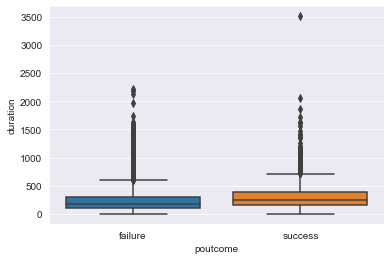

In [41]:
sns.boxplot(data = df_poutcome_duration, x ='poutcome',y ='duration')

Text(0.5, 1.0, 'Duration & Previous Outcome & Day of Week')

<Figure size 1440x360 with 0 Axes>

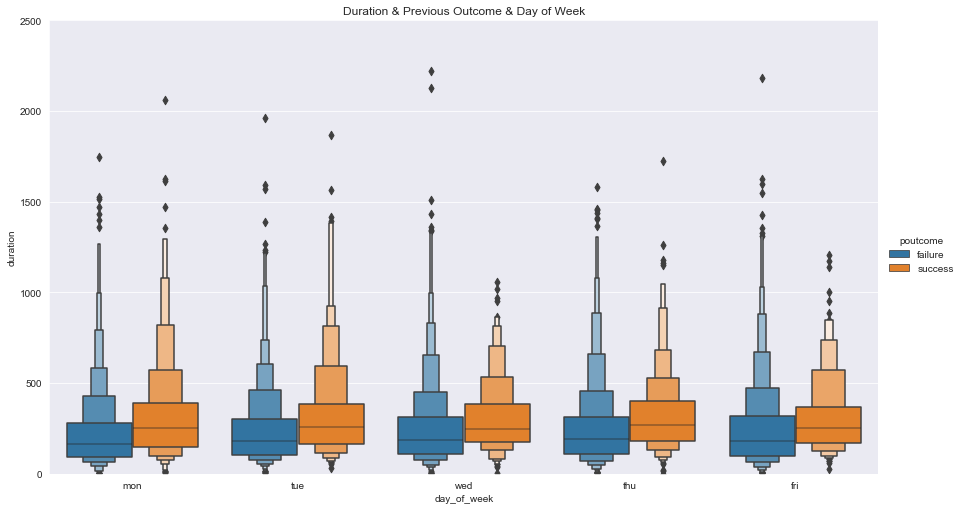

In [42]:
plt.figure(figsize=(20,5))
ax = sns.catplot(
    data=df_poutcome_duration,
    x="day_of_week", y="duration", hue="poutcome",
    kind = 'boxen', height = 7, aspect=16/9
)
plt.ylim(0,2500)
plt.title('Duration & Previous Outcome & Day of Week')

Text(0.5, 1.0, 'Duration & Previous Outcome & Day of Week')

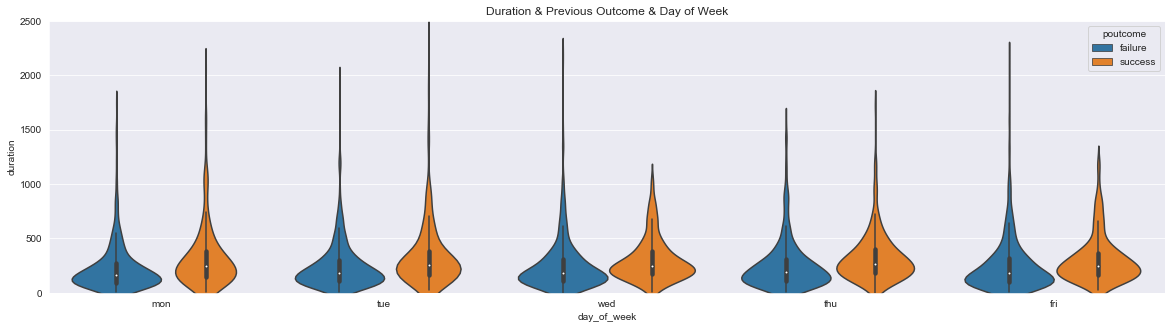

In [43]:
plt.figure(figsize=(20,5))
ax = sns.violinplot(
    data=df_poutcome_duration,
    x="day_of_week", y="duration", hue="poutcome",
    kind = 'boxen', height = 7, aspect=16/9
)
plt.ylim(0,2500)
plt.title('Duration & Previous Outcome & Day of Week')

The hypothesis seems to be valid. The previous campaign was more successful on average due to longer call durations.

## 5

Customers with a university degree have the lowest number of loans compared to the population of customers with the same highest educational attainment.

In [44]:
loan_education = df[(df['education'] != 'unknown')]
loan_education = loan_education.groupby(["loan","education"])['age'].count()
loan_education = loan_education.unstack('loan')
display(loan_education)

loan,no,unknown,yes
education,,,
basic.4y,3435.0,117.0,624.0
basic.6y,1902.0,60.0,330.0
basic.9y,5011.0,151.0,883.0
high.school,7852.0,220.0,1443.0
illiterate,15.0,NaN,3.0
professional.course,4325.0,125.0,793.0
university.degree,9961.0,277.0,1930.0


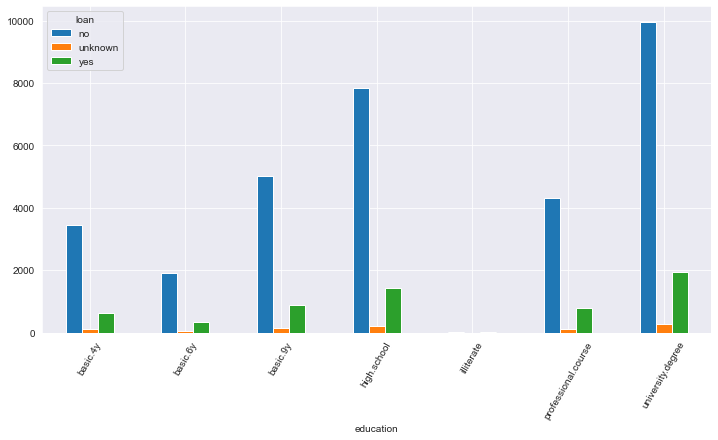

In [45]:
loan_education.plot.bar(figsize=(12,6))
plt.xticks(rotation = 60)
plt.show()

In [46]:
relative_loans = pd.DataFrame(loan_education["yes"]/(loan_education["no"]+loan_education["yes"]), columns = ["relative_loans"])
relative_loans

,relative_loans
education,
basic.4y,0.153732
basic.6y,0.147849
basic.9y,0.149813
high.school,0.155245
illiterate,0.166667
professional.course,0.154943
university.degree,0.162308


In [47]:
relative_loans.loc[relative_loans["relative_loans"] == min(relative_loans["relative_loans"])]

,relative_loans
education,
basic.6y,0.147849


The hypothesis is false. Customers with *basic.6y* education have the lowest number of loans.

## 6

Is there a relationship between *subscribed* and economic indicators?

<AxesSubplot:xlabel='month', ylabel='euribor3m'>

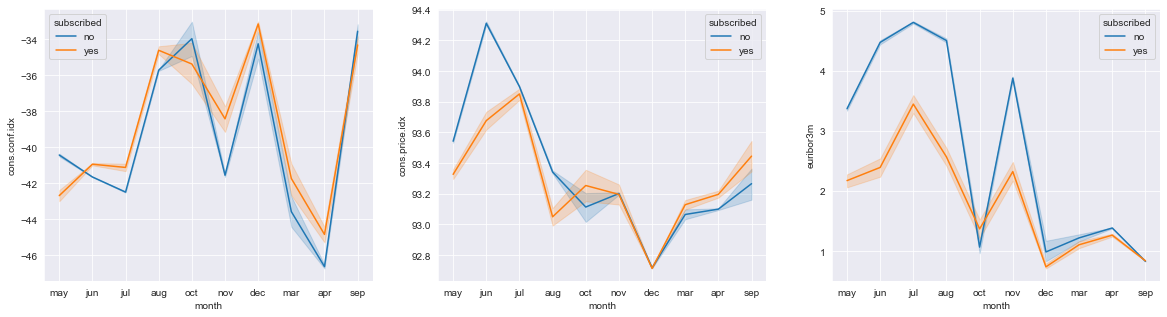

In [48]:
plt.figure(figsize=(20,5))
w = 3
plt.subplot(1,w,1)
sns.lineplot(
    data = df, x = 'month', y= 'cons.conf.idx', hue='subscribed'
)
plt.subplot(1,w,2)
sns.lineplot(
    data = df, x = 'month', y= 'cons.price.idx', hue='subscribed'
)
plt.subplot(1,w,3)
sns.lineplot(
    data = df, x = 'month', y= 'euribor3m', hue='subscribed'
)

- higher consumer price index indicates higher inflation
- consumer confidence index - higher => higher confidence
- euribor - when more people want to borrow money, the Euribor rate – like interest rates – increases

There is no clear relationship between *subscribed* and economic indicators.

## 7

Customers with university degree were previously contacted the most often.

In [49]:
uni_previous = df.loc[df['previous'] > 0]
uni_previous = uni_previous.loc[uni_previous['education'] != 'unknown']
uni_previous = uni_previous.groupby(["previous", "education"])["previous"].count().reset_index(name="count")
uni_previous = uni_previous.loc[uni_previous['count'] > 75]
display(uni_previous)

,previous,education,count
0,1,basic.4y,379
1,1,basic.6y,227
2,1,basic.9y,651
3,1,high.school,1155
5,1,professional.course,570
6,1,university.degree,1387
10,2,high.school,186
11,2,professional.course,81
12,2,university.degree,262
18,3,university.degree,89


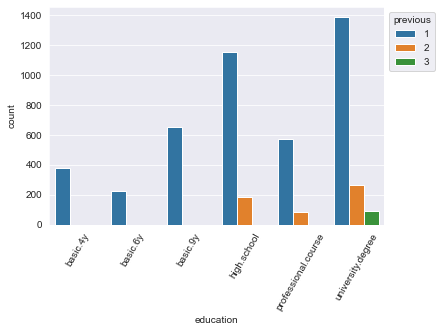

In [50]:
ax = sns.barplot(data=uni_previous, x="education", y="count", hue='previous')
plt.xticks(rotation=60)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

The hypothesis holds.

## 8

Entrepreneurs subscribed more often than technicians.

In [51]:
df_tech_entrep_sub = df.loc[(df['job'] == 'technician') | (df['job'] == 'entrepreneur')]
df_tech_entrep_sub = df_tech_entrep_sub.groupby(["job", "subscribed"])["subscribed"].count().reset_index(name="count")
display(df_tech_entrep_sub)
df_technician_sub = df_tech_entrep_sub.loc[(df_tech_entrep_sub['job'] == 'technician')]
df_entrepreneur_sub = df_tech_entrep_sub.loc[(df_tech_entrep_sub['job'] == 'entrepreneur')]

,job,subscribed,count
0,entrepreneur,no,1332
1,entrepreneur,yes,124
2,technician,no,6013
3,technician,yes,730


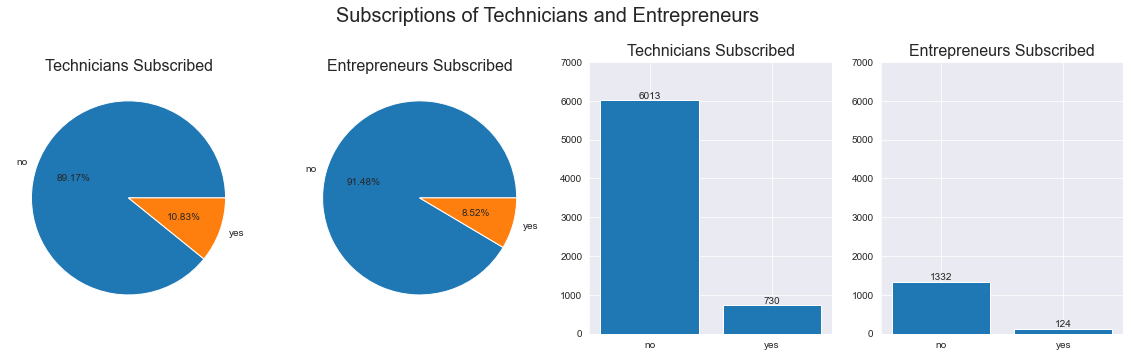

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle("Subscriptions of Technicians and Entrepreneurs", fontsize=20, va="bottom", ha= "center")

# PIES
axes[0].pie(x=list(df_technician_sub["count"].values),
                labels=df_technician_sub["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[0].set_title("Technicians Subscribed", fontsize=16)
axes[1].pie(x=list(df_entrepreneur_sub["count"].values),
                labels=df_entrepreneur_sub["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[1].set_title("Entrepreneurs Subscribed", fontsize=16)

#BAR PLOTS
ylim = 7_000
bar = axes[2].bar(x=df_technician_sub["subscribed"], height = df_technician_sub["count"].values)
axes[2].set_title("Technicians Subscribed", fontsize=16)
axes[2].bar_label(bar)
axes[2].set_ylim(0,ylim)
bar= axes[3].bar(x=df_entrepreneur_sub["subscribed"], height = df_entrepreneur_sub["count"].values)
axes[3].set_title("Entrepreneurs Subscribed", fontsize=16)
axes[3].bar_label(bar)
axes[3].set_ylim(0,ylim);

The hypothesis is false.

## 9

Customers with mortgage (*housing*) subscribed more often.

In [53]:
df_mortgage = df.loc[df['housing'] == 'yes']
df_mortgage = df_mortgage.groupby(["subscribed"])["subscribed"].count().reset_index(name="count")
display(df_mortgage)
df_no_mortgage = df.loc[df['housing'] == 'no']
df_no_mortgage = df_no_mortgage.groupby(["subscribed"])["subscribed"].count().reset_index(name="count")
display(df_no_mortgage)

,subscribed,count
0,no,19069
1,yes,2507


,subscribed,count
0,no,16596
1,yes,2026


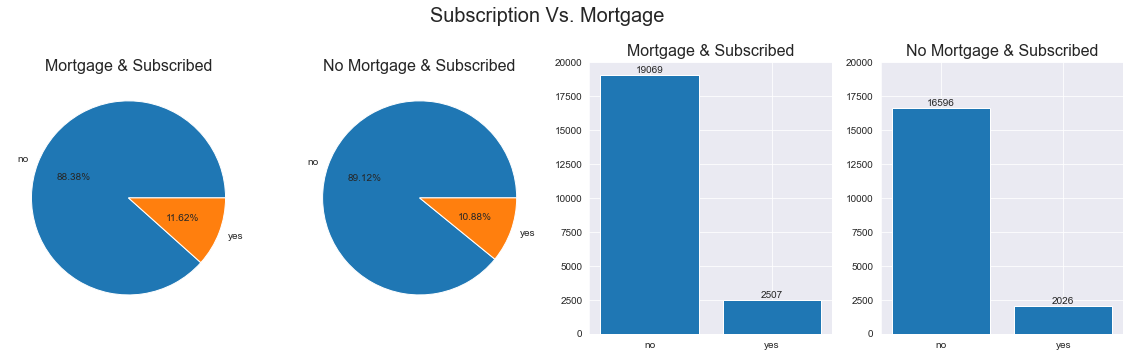

In [54]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle("Subscription Vs. Mortgage", fontsize=20, va="bottom", ha= "center")

# PIES
axes[0].pie(x=list(df_mortgage["count"].values),
                labels=df_mortgage["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[0].set_title("Mortgage & Subscribed", fontsize=16)
axes[1].pie(x=list(df_no_mortgage["count"].values),
                labels=df_no_mortgage["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[1].set_title("No Mortgage & Subscribed", fontsize=16)

#BAR PLOTS
ylim = 20_000
bar = axes[2].bar(x=df_mortgage["subscribed"], height = df_mortgage["count"].values)
axes[2].set_title("Mortgage & Subscribed", fontsize=16)
axes[2].bar_label(bar)
axes[2].set_ylim(0,ylim)
bar= axes[3].bar(x=df_no_mortgage["subscribed"], height = df_no_mortgage["count"].values)
axes[3].set_title("No Mortgage & Subscribed", fontsize=16)
axes[3].bar_label(bar)
axes[3].set_ylim(0,ylim);

The hypothesis holds.

## 10

Customers with a personal loan subscribed more often.

In [55]:
df_loan = df.loc[df['loan'] == 'yes']
df_loan = df_loan.groupby(["subscribed"])["subscribed"].count().reset_index(name="count")
display(df_loan)
df_no_loan = df.loc[df['loan'] == 'no']
df_no_loan = df_no_loan.groupby(["subscribed"])["subscribed"].count().reset_index(name="count")
display(df_no_loan)

,subscribed,count
0,no,5565
1,yes,683


,subscribed,count
0,no,30100
1,yes,3850


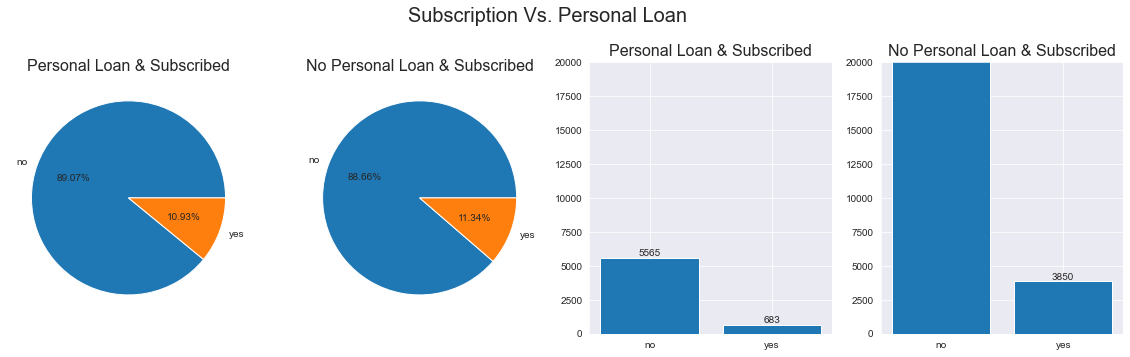

In [56]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle("Subscription Vs. Personal Loan", fontsize=20, va="bottom", ha= "center")

# PIES
axes[0].pie(x=list(df_loan["count"].values),
                labels=df_loan["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[0].set_title("Personal Loan & Subscribed", fontsize=16)
axes[1].pie(x=list(df_no_loan["count"].values),
                labels=df_no_loan["subscribed"].tolist(),
                autopct='%.2f%%',)
axes[1].set_title("No Personal Loan & Subscribed", fontsize=16)

#BAR PLOTS
ylim = 20_000
bar = axes[2].bar(x=df_loan["subscribed"], height = df_loan["count"].values)
axes[2].set_title("Personal Loan & Subscribed", fontsize=16)
axes[2].bar_label(bar)
axes[2].set_ylim(0,ylim)
bar= axes[3].bar(x=df_no_loan["subscribed"], height = df_no_loan["count"].values)
axes[3].set_title("No Personal Loan & Subscribed", fontsize=16)
axes[3].bar_label(bar)
axes[3].set_ylim(0,ylim);

The hypothesis is false.

# Hypothesis Summary

1. Customers contacted on Tuesday subscribed more term deposits than customers contacted on Monday.
2. Single entrepreneurs subscribed most often compared to married or divorced entrepreneurs.
3. More customers with university degree opened a term deposit when they were contacted by cell phone.
4. Longer duration of the last call (*duration*) meant success during the previous campaign (*poutcome*).
5. Customers with *basic.6y* education have the lowest number of loans.
6. There is no clear relationship between *subscribed* and economic indicators.
7. Customers with university degree were previously contacted the most often.
8. Technicians subscribed more often than entrepreneurs.
9. Customers with mortgage (*housing*) subscribed more often.
10. Customers with no personal loan subscribed more often.